<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/main/Spectral_Clustering/03_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3: K-means

## K-means

We have already seen that we could embed the particles or data points into a space by their similiarity measure. The embedding has the property that points with high similarity are put closer. In two dimensional embedding, we could tell the groupping by eyes but what about in high dimensional embedding? Could we find a proper way to group the embedded points automatically? 

There are many methods available, such as Gaussian mixture models, hierarchical clustering etc. Here we introduce the simplest one, the K-means. We use the simple clustering method because we already embed the particles in a space with convenient property and we expect the clustering in the embedding space will be straightforward. 

Consider we have $n$ data points and we want to cluster them into $C$ clusters. The K-means algorithm is as follows.

1. Given a cluster assignment $(C_1, C_2, \dots, C_n)$ for the $n$ data points, compute the mean or centroid of each clusters $(m_1,\dots, m_K)$. 
2. Update the cluster assignment to the data points by the nearest center.
3. repeat step 1 and 2 until the assignment does not change any more

This method is intuitive: if a point belongs to a certain cluster $C_i$, it should be closer to the center of $C_i$ than any other cluster centers. 


## The K-means Class

We could write a simple class to run the K-means algorithm for given data points. We would build the class by three parts: initialize, fit and predict. The initialize function just specify some property of the class. The fit function should compute the cluster centroids and the predict function would assign clusters to any given data points.


In [1]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit(self, data, max_iter = 100):
        
        assign = [i for i in range(self.n_clusters)]*(data.shape[0]//self.n_clusters)
        assign += list(np.random.choice(np.arange(self.n_clusters), size=data.shape[0] - len(assign)))
        assign = np.array(assign)
        np.random.shuffle(assign)
        
        means = np.zeros(shape=(self.n_clusters, data.shape[1]))
        it = 0
        while it < max_iter:
            it +=1
            for k in range(self.n_clusters):
                #print (np.mean(data[assign == k,:], axis=0).shape)
                means[k,:] = np.mean(data[assign == k,:], axis = 0)
            
            dists = np.sum( (data[:,None, :] - means[None,:,:])**2, axis = -1)
            new_assign = np.argmin(dists, axis = -1)
            if np.sum(new_assign != assign) ==0 :
                break
            assign[:] = new_assign[:]
            
        self.means = means
    
        return self
    
    def predict(self, data):
        
        dists = np.sum( (data[:,None, :] - self.means[None,:,:])**2, axis = -1)
        assign = np.argmin(dists, axis = -1)
        return assign     

We could test our K-means function and see whether it will work on simple problems. Here, we generate data with three clusters. Each cluster is from a two dimensional gaussian distribution. The first cluster has distribution $\mathcal{N}((5,5), I)$, the second cluster has distribution $\mathcal{N}((0,0), I)$ and the last cluster has distribution $\mathcal{N}((-5,5), I)$. We can draw it easily.

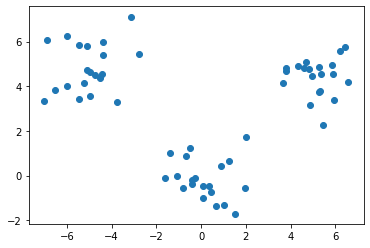

In [2]:
import matplotlib.pyplot as plt

data1 = np.random.multivariate_normal([5.0,5.0], np.eye(2), size=20)
data2 = np.random.multivariate_normal([0.0,0.0], np.eye(2), size=20)
data3 = np.random.multivariate_normal([-5.0,5.0], np.eye(2), size=20)

data = np.concatenate([data1,data2,data3], axis = 0)
plt.scatter(data[:,0], data[:,1])


Then, we could do the K-means algorithm to clustering the data. We should definitely use $3$ clusters. 

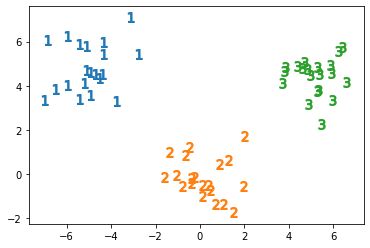

In [3]:
km = KMeans(3)
km.fit(data)
cluster_assign = km.predict(data)

def plot_clustering(data, assign, ax = None):
    n = np.max(assign)+1
    if ax is None:
        ax = plt.gca()
    for i in range(n):
        ax.scatter(data[assign==i,0], data[assign==i,1], marker=f"${i+1}$", s = 20*5 )
    return ax

plot_clustering(data, cluster_assign)

In the plot, data points are plotted by the cluster assignment. We could see that the points closer to each other possess same labeling and this indicates that the K-means algorithm works well. 